<a href="https://colab.research.google.com/github/erinbugbee/2023CLIHC-SpeedyIBL-Workshop/blob/main/Demonstration_BinaryChoice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Using SpeedyIBL for binary choice task

From the list of inputs of the class Agent, although we need 5 inputs to create an IBL agent, by using the defaults for noise, decay, mismatchPenalty, and lendeque, we only need to pass the default_utility = 4.4. Hence we create an IBL agent for the binary choice task as follows:

In [1]:
%pip install -U speedyibl
from speedyibl import Agent

In [2]:
agent = Agent(default_utility=4.4)

We then define a list of options for the agent to choose:

In [3]:
options = ['A','B'] # A is the safe option while B is the risky one

We are ready to make the agent choose one of the two options

In [4]:
choice = agent.choose(options)

We now determine a reward that the agent can receive after choosing one option.

In [5]:
import random
def reward(choice):
  if choice == 'A':
    r = 3
  elif random.random() <= 0.8:
    r = 4
  else:
    r = 0
  return r

After choosing one option and observing the reward, we use the function respond, see the table above, to store the instance in the memory as follows:

In [6]:
print(choice)
r = reward(choice)
print(r)
agent.respond(r)

A
3


In [7]:
agent.instances()

option      outcome  occurences
--------  ---------  ------------
A               3    [1]
A               4.4  [0]


Compute activation, probability, and blended values

In [8]:
print(agent.CompActivation(agent.t+1,'A'))
print(agent.CompProbability(agent.t+1,'A'))
print(agent.CompActivation(agent.t+1,'B'))
print(agent.CompProbability(agent.t+1,'B'))
print(agent.CompBlended(agent.t+1,options))

(array([0.34281664, 0.24122225]), array([3. , 4.4]))
(array([0.96365311, 0.03634689]), array([3. , 4.4]))
(array([-0.36995767]), array([4.4]))
(array([1.]), array([4.4]))
[(3.3396258477324645, 0), (4.4, 1)]


In [9]:
choice = agent.choose(options)

In [10]:
print(choice)
r = reward(choice)
print(r)
agent.respond(r)
agent.instances()

B
4
option      outcome  occurences
--------  ---------  ------------
A               3    [1]
A               4.4  [0]
B               4    [2]
B               4.4  [0]


We have run one trial for the binary choice task, which includes choosing one option, observing the reward, storing the instance (respond). To conduct 1000 runs of 100 trials, we use two for loops as follows:

In [11]:
import time # to calculate time
runs = 1000 # number of runs (participants)
trials = 100 # number of trials (episodes)
average_p = [] # to store average of performance (proportion of maximum reward expectation choice)
average_time = [] # to save time
for r in range(runs):
  pmax = []
  ttime = [0]
  agent.reset() #clear the memory for a new run
  for i in range(trials):
    start = time.time()
    choice = agent.choose(options) # choose one option from the list of two
    # determine the reward that agent can receive
    r = reward(choice)
    # store the instance
    agent.respond(r)
    end = time.time()
    ttime.append(ttime[-1]+ end - start)
    pmax.append(choice == 'B')
  average_p.append(pmax) # save performance of each run
  average_time.append(ttime) # save time of each run

We also provide the following code to plot the running time and performance of this SpeedyIBL agent

<ipython-input-12-6e8945062da0>:3: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "o-" (-> linestyle='-'). The keyword argument will take precedence.
  plt.plot(range(trials), np.mean(np.asarray(average_p),axis=0), 'o-', color='darkgreen', markersize=2, linestyle='--', label='speedyIBL')


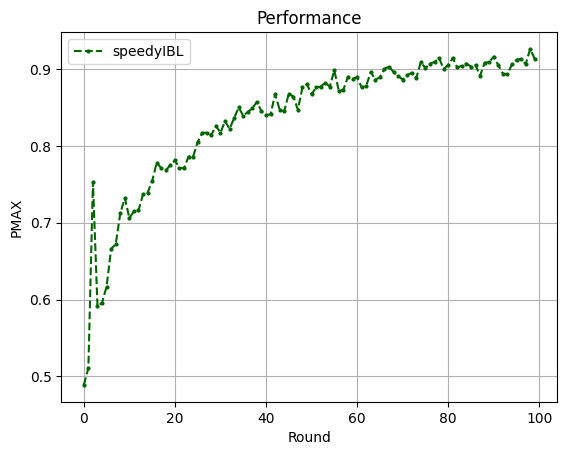

In [12]:
import matplotlib.pyplot as plt
import numpy as np
plt.plot(range(trials), np.mean(np.asarray(average_p),axis=0), 'o-', color='darkgreen', markersize=2, linestyle='--', label='speedyIBL')
plt.xlabel('Round')
plt.ylabel('PMAX')
plt.title('Performance')
plt.legend()
plt.grid(True)
plt.show()